<a href="https://colab.research.google.com/github/ShadaFathima/Booking-App/blob/main/AE_implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#connect to drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from scipy import misc
import os
from PIL import Image
import scipy.misc
import imageio
from skimage.transform import rescale, resize

In [ ]:
import keras
from tensorflow.keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import BatchNormalization

In [ ]:
data =glob('/content/drive/MyDrive/DL/brain_tumor_dataset*/*/*')

len(data)

253

In [ ]:
images = []
def read_images(data):
  for i in range(len(data)):
    img = cv2.imread(data[i])
    img = cv2.resize(img,(224,224))
    images.append(img)
  return images

In [ ]:
images = read_images(data)

In [ ]:
images_arr = np.asarray(images)
images_arr = images_arr.astype('float32')
images_arr.shape

(253, 224, 224, 3)

In [ ]:
images_arr = images_arr.reshape(-1, 224,224, 3)
images_arr = images_arr / np.max(images_arr)

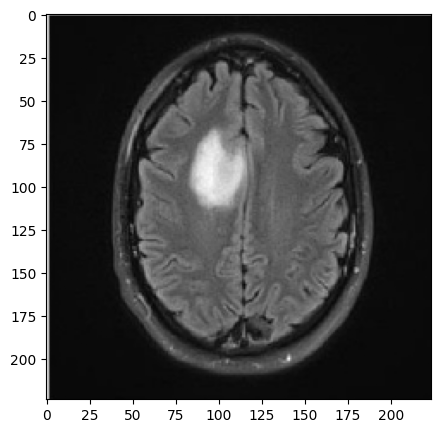

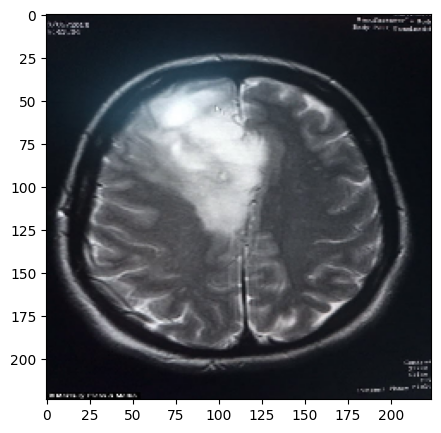

In [ ]:
# Display the first two images in training data
for i in range(2):
  plt.figure(figsize=[5, 5])
  curr_img = np.reshape(images_arr[i],(224,224,3))
  plt.imshow(curr_img)
  plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train_X,valid_X,train_ground,valid_ground = train_test_split(images_arr,images_arr,test_size=0.2,random_state=13)

In [ ]:
batch_size = 64
epochs = 20
inChannel = 3
x, y = 224, 224
input_img = Input(shape = (x, y, inChannel))

In [ ]:
def autoencoder(input_img):
#encoder
#input = 224 x 224 x 3 (wide and thin)
  conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
  pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #112 x 112 x 32
  conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #112 x 112 x 64
  pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #56 x 56 x 64
  conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #56 x 56 x 128 (small and thick)
  #decoder
  conv4 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3) #56 x 56 x 128
  up1 = UpSampling2D((2,2))(conv4) # 112 x 112 x 128
  conv5 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1) # 112 x 112 x 64
  up2 = UpSampling2D((2,2))(conv5) # 224 x 224 x 64
  decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(up2) # 224 x 224 x 3
  return decoded

In [ ]:
autoencoder = Model(input_img,autoencoder(input_img))
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 112, 112, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 224, 224, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 224, 224, 3)    │         1,731 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 316,355 (1.21 MB)

 Trainable params: 316,355 (1.21 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
autoencoder.compile(loss='mean_squared_error',optimizer = RMSprop())

In [ ]:
autoencoder_train =autoencoder.fit(train_X,train_ground,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(valid_X,valid_ground))

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 36s 4s/step - loss: 0.1174 - val_loss: 0.1201
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 237ms/step - loss: 0.1090 - val_loss: 0.0797
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step - loss: 0.0762 - val_loss: 0.0401
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 232ms/step - loss: 0.0525 - val_loss: 0.0241
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 247ms/step - loss: 0.0224 - val_loss: 0.0256
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 254ms/step - loss: 0.0274 - val_loss: 0.0225
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 244ms/step - loss: 0.0252 - val_loss: 0.0193
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 258ms/step - loss: 0.0216 - val_loss: 0.0260
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 238ms/step - loss: 0.0230 - val_loss: 0.0173
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 232ms/step - loss: 0.0191 - val_loss: 0.0225
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 251ms/step - loss: 0.0229 - val_loss: 0.0172
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 231ms/step - loss: 0.0171 - val_loss

In [ ]:
autoencoder.save('AE.h5')

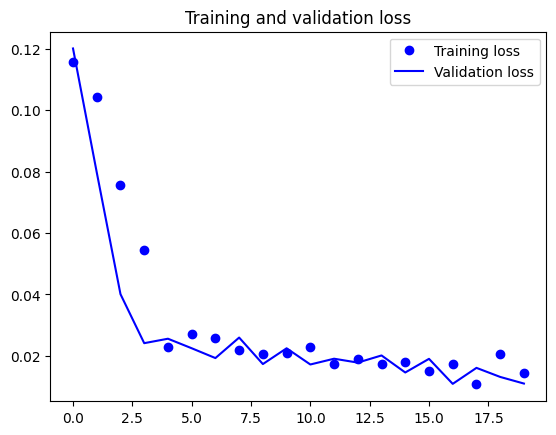

In [ ]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(epochs)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
pred = autoencoder.predict(train_ground)

7/7 ━━━━━━━━━━━━━━━━━━━━ 6s 267ms/step


Test Images


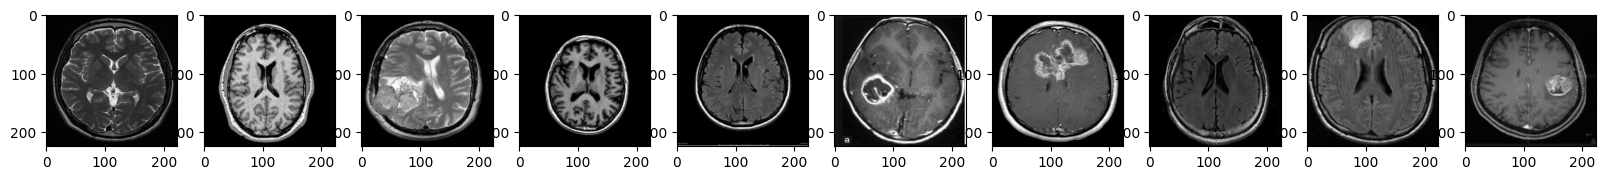

Reconstruction of Test Images


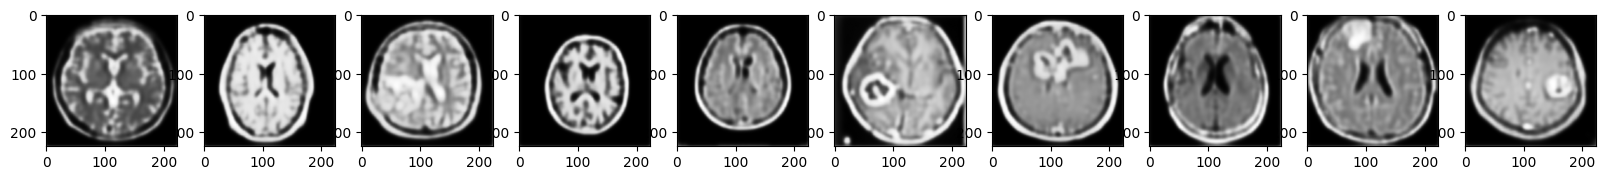

In [ ]:
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10):
  plt.subplot(2, 10, i+1)
  plt.imshow(train_ground[i, ..., 0], cmap='gray')
plt.show()
plt.figure(figsize=(20, 4))
print("Reconstruction of Test Images")
for i in range(10):
  plt.subplot(2, 10, i+1)
  plt.imshow(pred[i, ..., 0], cmap='gray')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model
model = load_model('AE.h5')
pred = model.predict(valid_X)

2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


Test Images


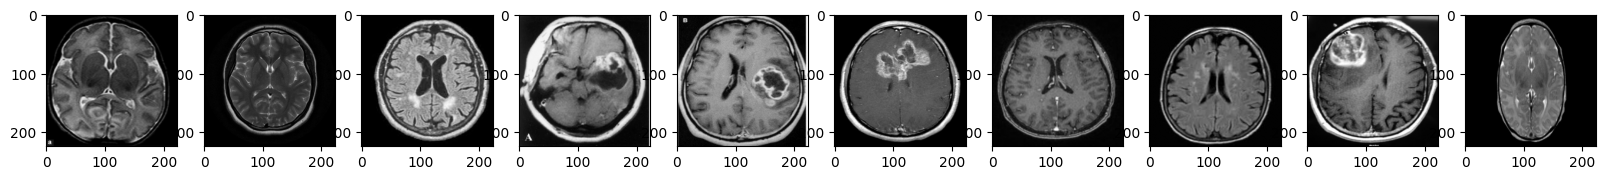

Reconstruction of Test Images


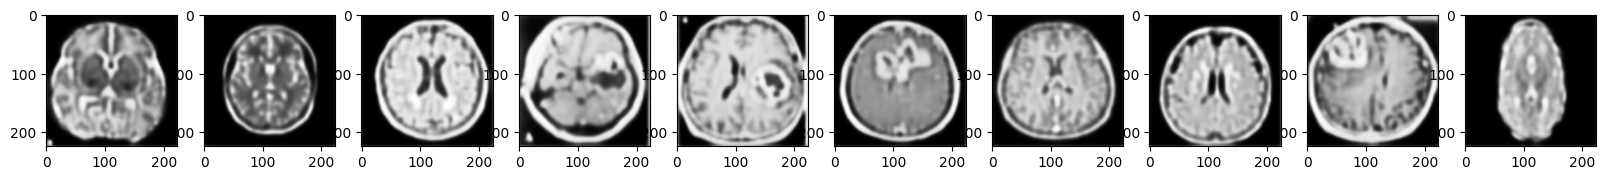

In [ ]:
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10):
  plt.subplot(2, 10, i+1)
  plt.imshow(valid_X[i, ..., 0], cmap='gray')
plt.show()
plt.figure(figsize=(20, 4))
print("Reconstruction of Test Images")
for i in range(10):
  plt.subplot(2, 10, i+1)
  plt.imshow(pred[i, ..., 0], cmap='gray')
plt.show()